In [1]:
using Distributions, Plots, LinearAlgebra, StatsPlots, Statistics

In [2]:
using Optim

In [3]:
function c1(x)
    if x < 2.5
        return 1
    else
        return 0
    end
end

function c2(x)
    if x >= 2.5 && x < 5
        return 1
    else
        return 0
    end
end

function c3(x)
    if x >= 5 && x < 7.5
        return 1
    else
        return 0
    end
end

function c4(x)
    if x >=7.5
        return 1
    else
        return 0
    end
end

c4 (generic function with 1 method)

In [8]:
N = 500
x = rand(Uniform(0,10),N)
x2 = rand(Uniform(0,10),N)
y = 52*c1.(x) .+ 10*c2.(x) .+ 25*c3.(x) .+ 40*c4.(x) .+ rand(Normal(0,1),N)
function aaa(x)
    y = 0
    
    if x < 4
        y = 52 + rand(Normal(0,3))
    elseif x > 6
        y = 20 + rand(Normal(0,3))
    end
    return y
end

# y = aaa.(x)

aaa (generic function with 1 method)

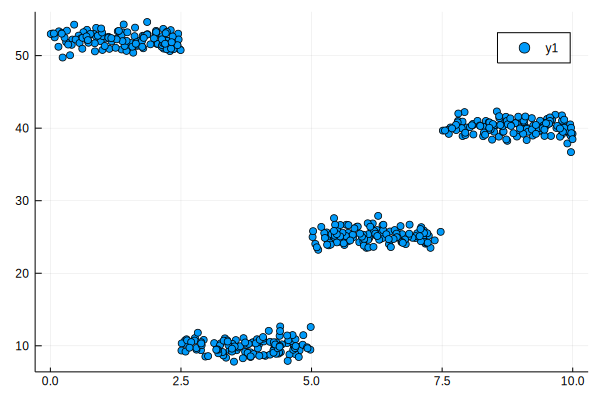

In [9]:
scatter(x,y)

In [12]:
# filter(!iszero, a)
        
less(x,y,s) = filter(!iszero,((x .< s) .* y))
gre(x,y,s) = filter(!iszero, ((x .>= s) .*y))

f(s) = sum((less(x,y,s) .- mean(less(x,y,s))).^2) + sum((gre(x,y,s) .- mean(gre(x,y,s))) .^2)
# svec = 0:0.01:10
# plot(svec, f.(svec))
# ls = less(x,y,5)
# mn = mean(less(x,y,5))
# sum((ls .- mn).^2)

f (generic function with 1 method)

In [17]:
function rc(f, start)
    ticks = copy(start)
    while length(ticks) <= 4
        out = optimize(f,start[1],start[2])
        push!(ticks,out.minimizer)
        sort!(ticks)
        idx = max_diffs(ticks)
        start[1] = idx-1
        start[2] = idx
    end
    return ticks
end

function max_diffs(ary)
    idx = 1
    mx = 0
    for i in 2:length(ary)
        if abs(ary[i]-ary[i-1]) > mx
            mx = abs(ary[i]-ary[i-1])
            idx = i
        end
    end
    return idx 
end
c = rc(f,[0.,10.])

5-element Array{Float64,1}:
  0.0               
  2.4956491438252355
  2.5276596059637852
  3.067619171227075 
 10.0               

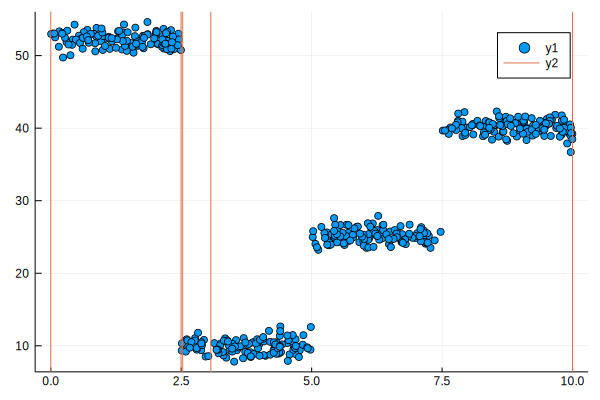

In [18]:
scatter(x,y)
vline!([c[:]])

In [19]:
function p_b_ref(ary)
    if length(ary) > 3
        return
    else
        push!(ary,1)
        p_b_ref(ary)
        return ary
    end
end

p_b_ref([])

4-element Array{Any,1}:
 1
 1
 1
 1

In [22]:
maximum([1,2,3,100]), argmax([1,2,3,100])

(100, 4)

In [23]:
istwo(x) = x==2
isinary(x) = x in a
a = [0,0,0,0,1,2]
b = [0,1,9,18,1]

filter(!isinary, b)


2-element Array{Int64,1}:
  9
 18

### The Bootstrap Makes Use of Two-Thirds of the Observations? 

In [27]:
using DataFrames

In [79]:

x1 = rand(DiscreteUniform(-1000000,1000000),10000)
x2 = rand(x1,10000)
sort!(x1)
sort!(x2)
isinary(x) = x in x2
d = filter(!isinary,x1)
# length(d)/length(x1)

df = DataFrame(x1=x1,x2=x2)
length(d)/10000


0.3627

In [97]:
a = 1:100
b = rand(a,100)
sort!(unique(b))

65-element Array{Int64,1}:
  1
  2
  3
  5
  7
  8
  9
 10
 12
 13
 15
 16
 18
  ⋮
 75
 76
 77
 78
 79
 83
 85
 87
 88
 89
 95
 99